<a href="https://colab.research.google.com/github/DSKI23/alzheimervalentin/blob/7-clear-data-pipeline/DataCleaning/not_usefull_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -r "https://raw.githubusercontent.com/DSKI23/alzheimervalentin/refs/heads/main/requirements_colab.txt"

In [1]:
from huggingface_hub import notebook_login
notebook_login()

In [3]:
from datasets import load_dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

alzheimer_df = load_dataset("DS23-KI-Projekt/alzheimerdataset")
df = alzheimer_df["train"].to_pandas()
df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


alzheimers_prediction_dataset.csv:   0%|          | 0.00/10.1M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/74283 [00:00<?, ? examples/s]

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Diabetes,Hypertension,...,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Genetic Risk Factor (APOE-ε4 allele),Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,Male,1,33.0,Medium,Never,Occasionally,No,No,...,Healthy,High,Retired,Single,No,Low,Medium,High,Urban,No
1,Argentina,72,Male,7,29.9,Medium,Former,Never,No,No,...,Healthy,Medium,Unemployed,Widowed,No,High,Low,High,Urban,No
2,South Africa,86,Female,19,22.9,High,Current,Occasionally,No,Yes,...,Average,Medium,Employed,Single,No,Low,Medium,High,Rural,No
3,China,53,Male,17,31.2,Low,Never,Regularly,Yes,No,...,Healthy,Medium,Retired,Single,No,High,Medium,Low,Rural,No
4,Sweden,58,Female,3,30.0,High,Former,Never,Yes,No,...,Unhealthy,High,Employed,Married,No,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,Female,3,22.6,High,Former,Never,No,No,...,Average,High,Unemployed,Widowed,No,Medium,High,Medium,Rural,No
74279,UK,58,Male,18,30.6,Low,Never,Occasionally,Yes,No,...,Average,Medium,Unemployed,Single,No,Medium,High,High,Rural,No
74280,Spain,57,Female,13,28.2,Medium,Never,Regularly,No,No,...,Healthy,Low,Employed,Single,Yes,High,Low,Low,Rural,No
74281,Brazil,73,Female,7,29.0,Low,Never,Regularly,No,No,...,Healthy,Low,Employed,Widowed,No,Low,Low,High,Rural,No


In [4]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Physical Activity Level'"}, xlabel='Physical Activity Level', ylabel='Percentage'>

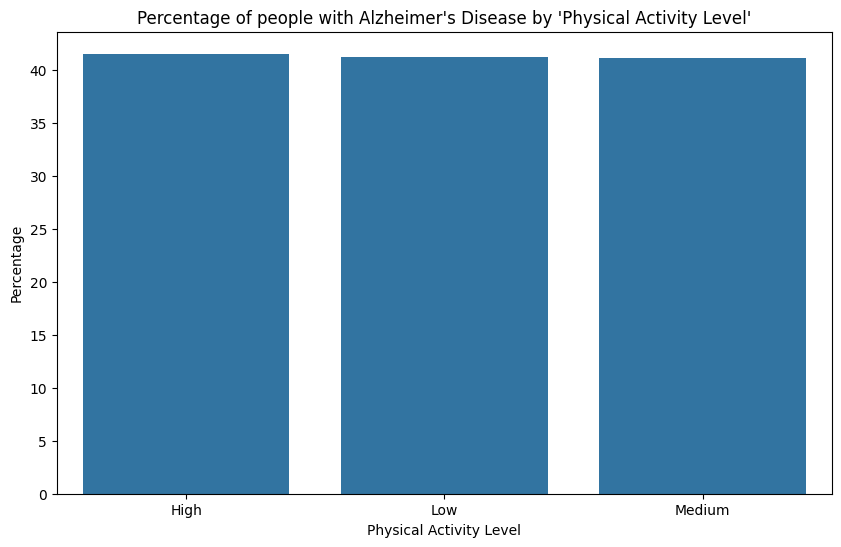

In [5]:
alzheimer_counts = df.groupby('Physical Activity Level')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Physical Activity Level')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Physical Activity Level")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Physical Activity Level'")
sns.barplot(data=m_df, x='Physical Activity Level', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Smoking Status'"}, xlabel='Smoking Status', ylabel='Percentage'>

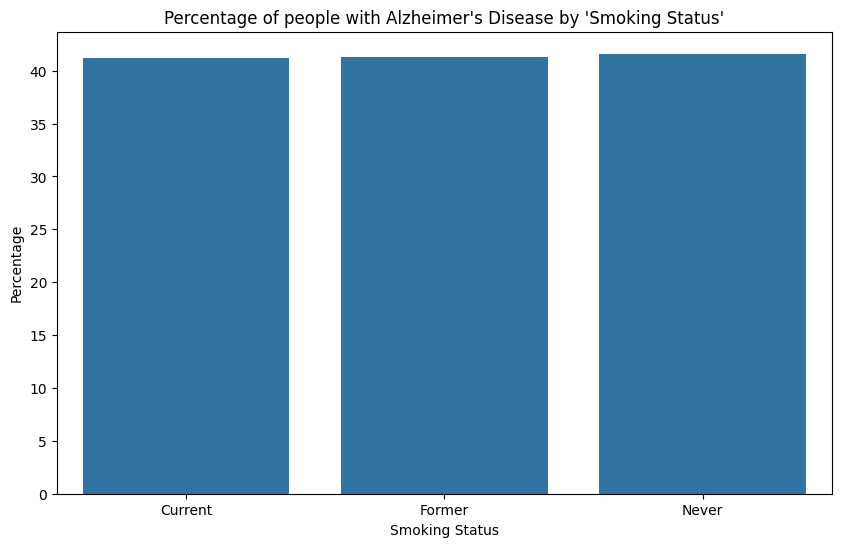

In [6]:
alzheimer_counts = df.groupby('Smoking Status')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Smoking Status')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Smoking Status")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Smoking Status'")
sns.barplot(data=m_df, x='Smoking Status', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Alcohol Consumption'"}, xlabel='Alcohol Consumption', ylabel='Percentage'>

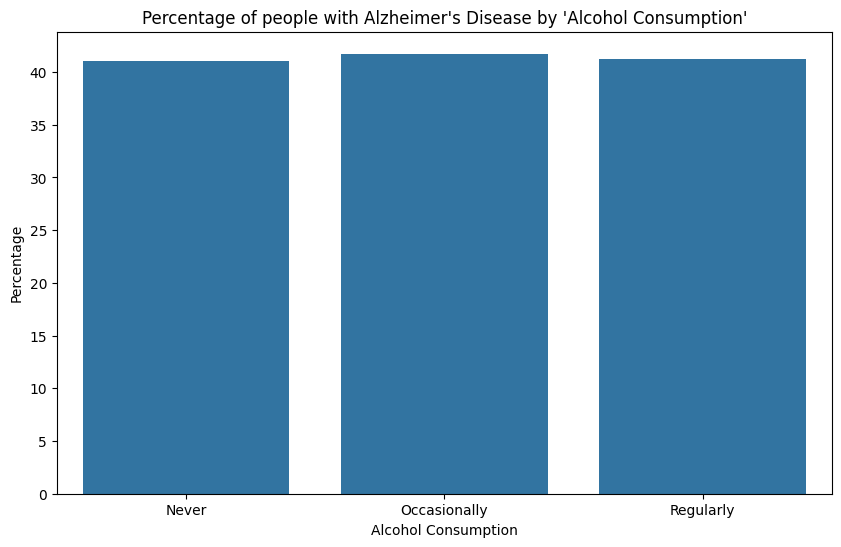

In [7]:
alzheimer_counts = df.groupby('Alcohol Consumption')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Alcohol Consumption')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Alcohol Consumption")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Alcohol Consumption'")
sns.barplot(data=m_df, x='Alcohol Consumption', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Diabetes'"}, xlabel='Diabetes', ylabel='Percentage'>

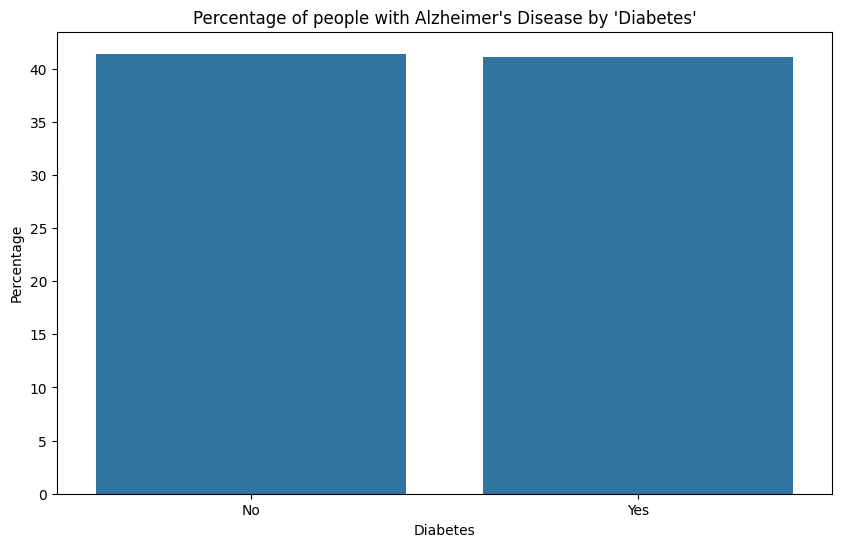

In [8]:
alzheimer_counts = df.groupby('Diabetes')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Diabetes')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Diabetes")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Diabetes'")
sns.barplot(data=m_df, x='Diabetes', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Hypertension'"}, xlabel='Hypertension', ylabel='Percentage'>

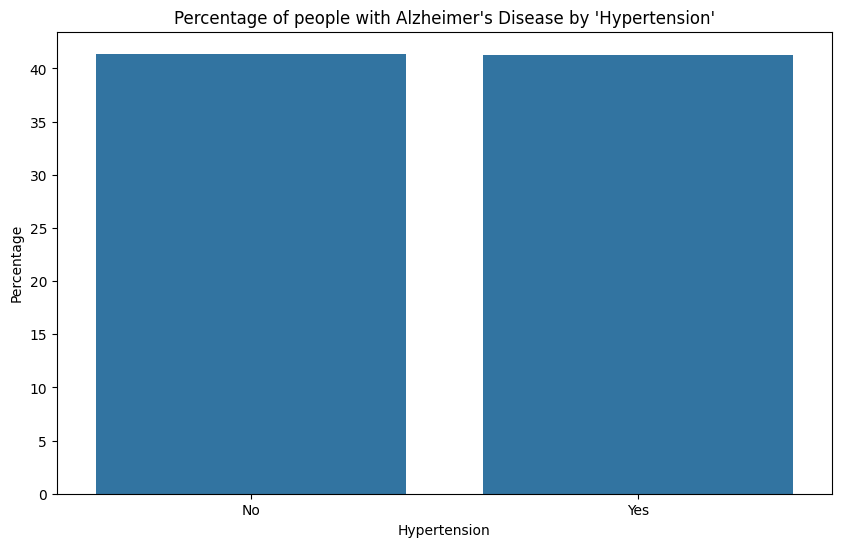

In [9]:
alzheimer_counts = df.groupby('Hypertension')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Hypertension')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Hypertension")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Hypertension'")
sns.barplot(data=m_df, x='Hypertension', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Cholesterol Level'"}, xlabel='Cholesterol Level', ylabel='Percentage'>

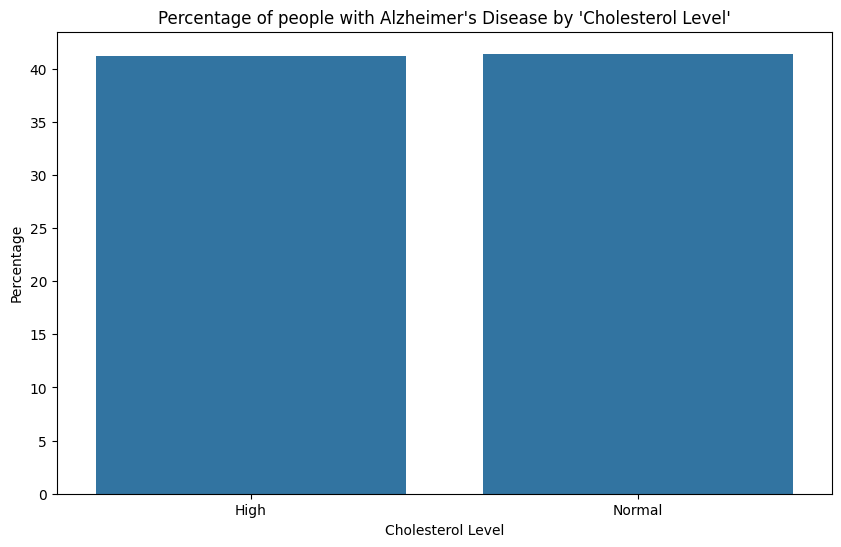

In [10]:
alzheimer_counts = df.groupby('Cholesterol Level')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Cholesterol Level')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Cholesterol Level")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Cholesterol Level'")
sns.barplot(data=m_df, x='Cholesterol Level', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Depression Level'"}, xlabel='Depression Level', ylabel='Percentage'>

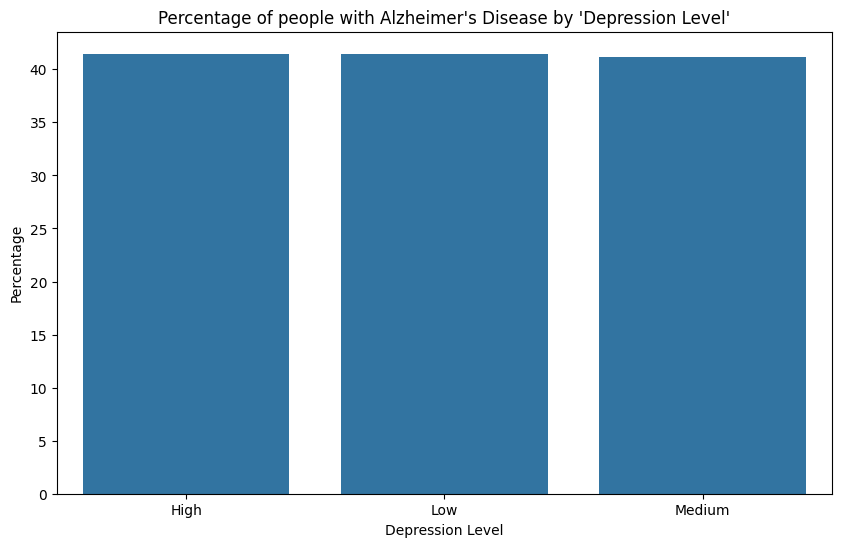

In [11]:
alzheimer_counts = df.groupby('Depression Level')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Depression Level')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Depression Level")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Depression Level'")
sns.barplot(data=m_df, x='Depression Level', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Sleep Quality'"}, xlabel='Sleep Quality', ylabel='Percentage'>

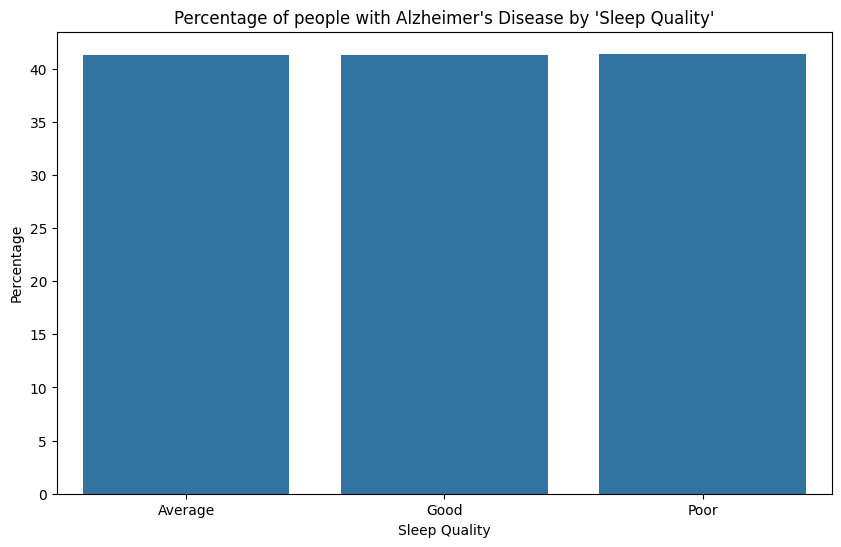

In [12]:
alzheimer_counts = df.groupby('Sleep Quality')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Sleep Quality')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Sleep Quality")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Sleep Quality'")
sns.barplot(data=m_df, x='Sleep Quality', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Gender'"}, xlabel='Gender', ylabel='Percentage'>

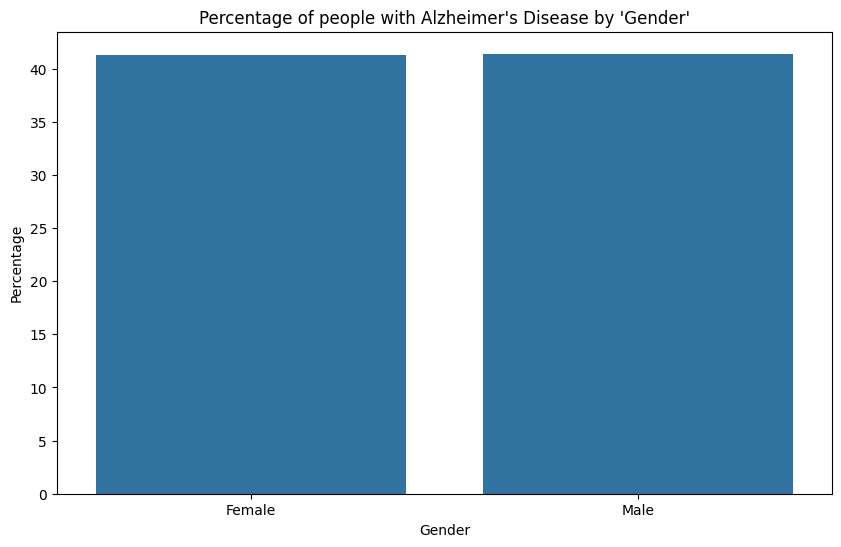

In [13]:
alzheimer_counts = df.groupby('Gender')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Gender')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Gender")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Gender'")
sns.barplot(data=m_df, x='Gender', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Dietary Habits'"}, xlabel='Dietary Habits', ylabel='Percentage'>

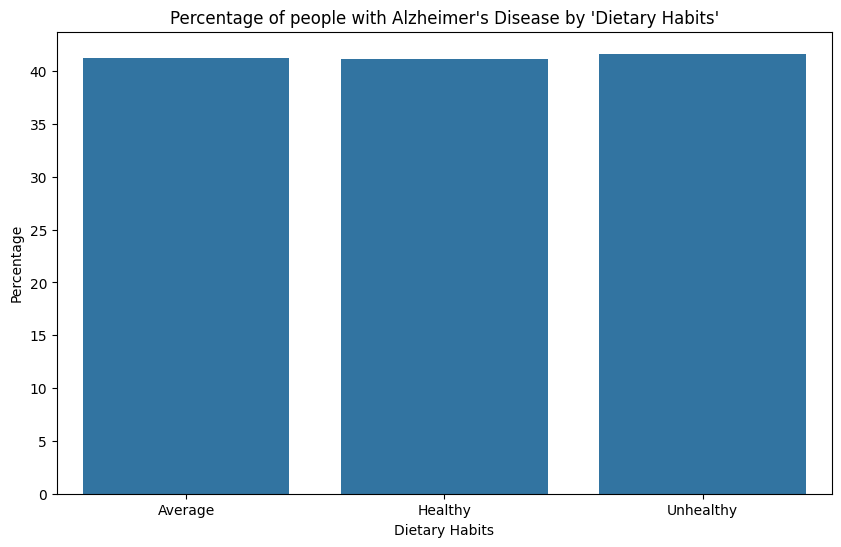

In [14]:
alzheimer_counts = df.groupby('Dietary Habits')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Dietary Habits')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Dietary Habits")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Dietary Habits'")
sns.barplot(data=m_df, x='Dietary Habits', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Air Pollution Exposure'"}, xlabel='Air Pollution Exposure', ylabel='Percentage'>

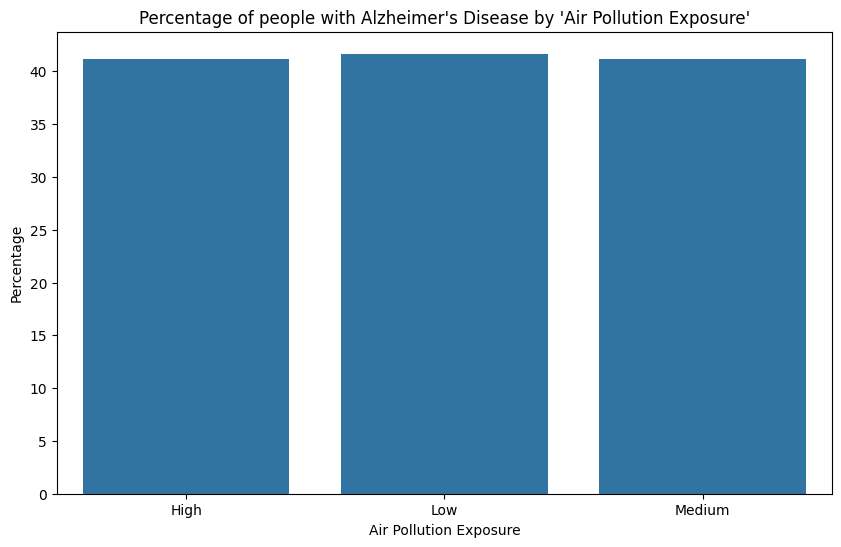

In [15]:
alzheimer_counts = df.groupby('Air Pollution Exposure')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Air Pollution Exposure')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Air Pollution Exposure")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Air Pollution Exposure'")
sns.barplot(data=m_df, x='Air Pollution Exposure', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Employment Status'"}, xlabel='Employment Status', ylabel='Percentage'>

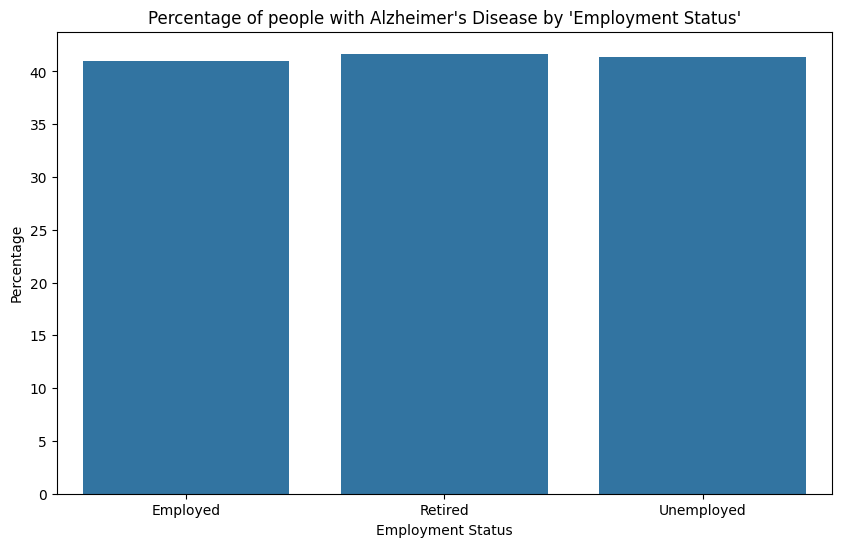

In [16]:
alzheimer_counts = df.groupby('Employment Status')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Employment Status')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Employment Status")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Employment Status'")
sns.barplot(data=m_df, x='Employment Status', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Marital Status'"}, xlabel='Marital Status', ylabel='Percentage'>

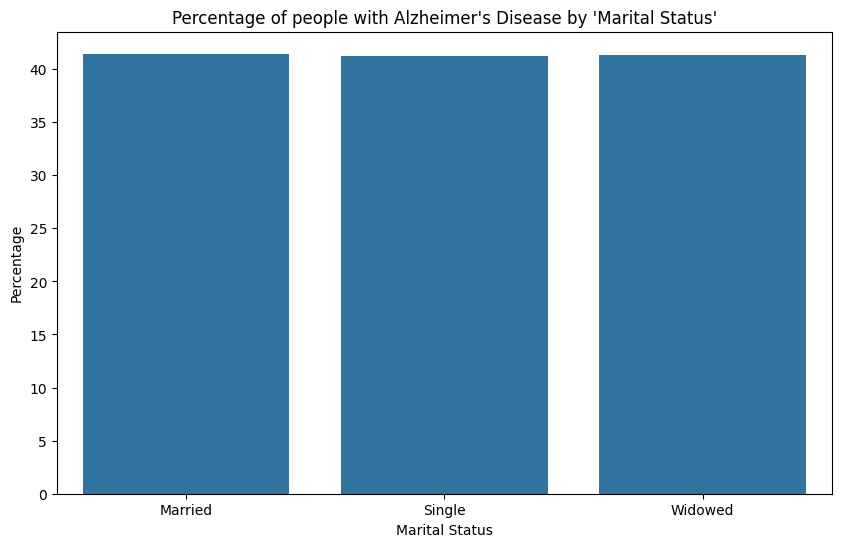

In [17]:
alzheimer_counts = df.groupby('Marital Status')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Marital Status')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Marital Status")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Marital Status'")
sns.barplot(data=m_df, x='Marital Status', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Social Engagement Level'"}, xlabel='Social Engagement Level', ylabel='Percentage'>

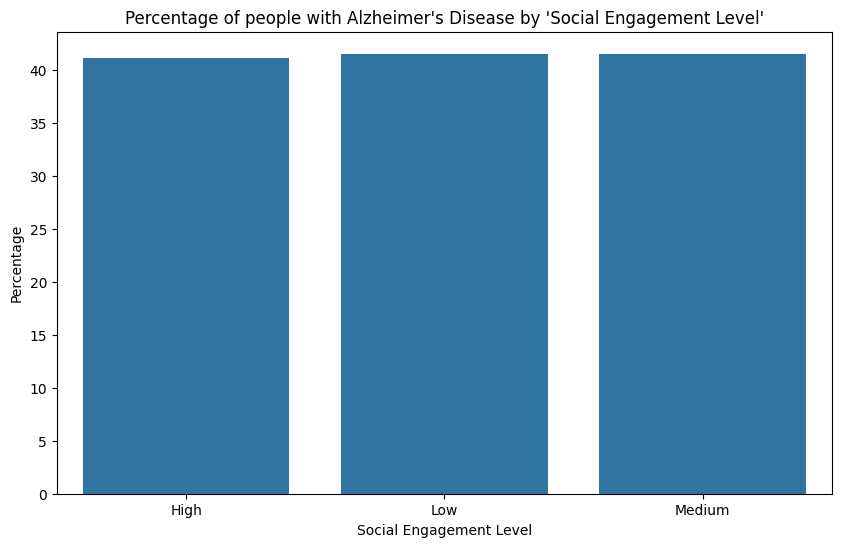

In [18]:
alzheimer_counts = df.groupby('Social Engagement Level')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Social Engagement Level')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Social Engagement Level")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Social Engagement Level'")
sns.barplot(data=m_df, x='Social Engagement Level', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Income Level'"}, xlabel='Income Level', ylabel='Percentage'>

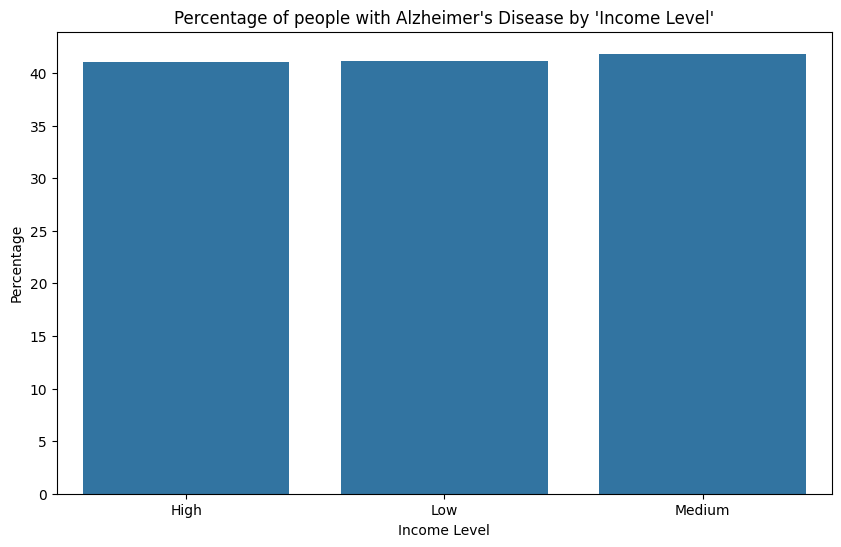

In [19]:
alzheimer_counts = df.groupby('Income Level')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Income Level')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Income Level")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Income Level'")
sns.barplot(data=m_df, x='Income Level', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Stress Levels'"}, xlabel='Stress Levels', ylabel='Percentage'>

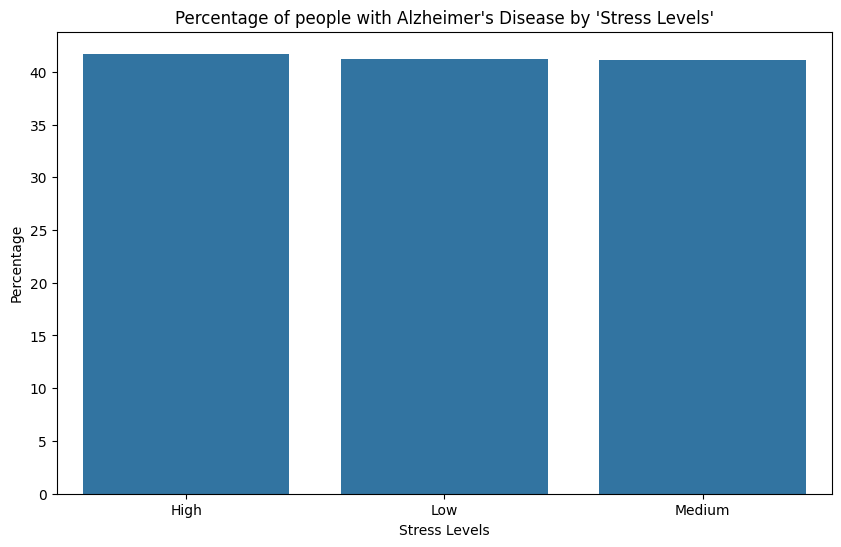

In [20]:
alzheimer_counts = df.groupby('Stress Levels')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Stress Levels')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Stress Levels")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Stress Levels'")
sns.barplot(data=m_df, x='Stress Levels', y="Percentage")

<Axes: title={'center': "Percentage of people with Alzheimer's Disease by 'Urban vs Rural Living'"}, xlabel='Urban vs Rural Living', ylabel='Percentage'>

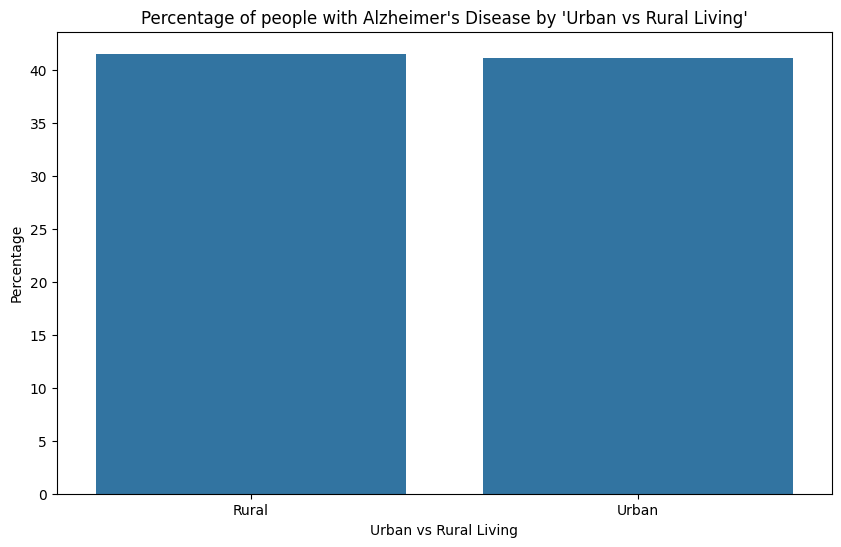

In [21]:
alzheimer_counts = df.groupby('Urban vs Rural Living')['Alzheimer’s Diagnosis'].apply(lambda x: (x == 'Yes').sum()).reset_index(name='Yes Count')

alzheimer_counts = alzheimer_counts.sort_values(by='Yes Count', ascending=False)

total_counts = df.groupby('Urban vs Rural Living')['Alzheimer’s Diagnosis'].count().reset_index(name='Total Count')


m_df = pd.merge(total_counts, alzheimer_counts, on="Urban vs Rural Living")


m_df["Percentage"] = (m_df["Yes Count"]/m_df['Total Count']*100).round(2)

m_df_2 = m_df.sort_values("Percentage", ascending=False)

m_df

plt.figure(figsize=(10, 6))
plt.title("Percentage of people with Alzheimer's Disease by 'Urban vs Rural Living'")
sns.barplot(data=m_df, x='Urban vs Rural Living', y="Percentage")